In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
n = [2**2,2**3,2**4,2**5,2**6,2**7]
n

[4, 8, 16, 32, 64, 128]

In [11]:
sequences = []
for length in n:
    sequences.append(np.random.randint(0,100,length))
print(sequences[5])

[69  4 59 72 19 27 28 41 53 61 87 11 75 83 33 26 30 18 67 18 87 21 26 98
  2 48 73 50  3 51 16 65 56 42 64 29 64 89 15 44 47  0 32 24 65  9 36 22
 73 73 66 64 74 42 48  7 91  8 39 48 68 91 90 26 71 54 96 58 36 14 85 44
 81 60  3 80 34 63 26 24  5 45 61  0 50 61 24 82 28 21 80 67 70  6 26 52
 61 64 21 81 75  2 42 88 15 45 39 72 51 80 80 85  2 60  1 77 77 93 75 37
 20 15 55 98 74 88 30 89]


In [47]:
def DFT(signal):
    N = len(signal)
    W_N = np.array(np.zeros(shape=(N,N)), dtype=complex)
    w_n = np.exp(-1*2j*np.pi/N)

    #matrix build
    for i in range(N):
        for j in range(N):
            W_N[i][j] = w_n ** (i*j)
    
    #print(W_N)
    DFTmatrix = np.matmul(W_N,signal)
    return DFTmatrix

In [48]:
signal = np.array([2,3,-1,1])
dft = DFT(signal)

In [39]:
def IDFT(signal):
    N = len(signal)
    W_N = np.array(np.zeros(shape=(N,N)), dtype=complex)
    w_n = np.exp(2j*np.pi/N)

    #matrix build
    for i in range(N):
        for j in range(N):
            W_N[i][j] = w_n ** (i*j)
    W_N = W_N/N
    IDFTmatrix = np.matmul(W_N,signal)
    return IDFTmatrix

In [49]:
dft

array([ 5.+0.00000000e+00j,  3.-2.00000000e+00j, -3.-9.79717439e-16j,
        3.+2.00000000e+00j])

In [50]:
signal = np.array([2, 3, -1, 1])
dft = DFT(signal)
idft = IDFT(dft)

# Output
print("Original Signal:", signal)
print("DFT:", dft)
print("IDFT (Recovered Signal):", idft.real)  # Take the real part for numerical stability

Original Signal: [ 2  3 -1  1]
DFT: [ 5.+0.00000000e+00j  3.-2.00000000e+00j -3.-9.79717439e-16j
  3.+2.00000000e+00j]
IDFT (Recovered Signal): [ 2.  3. -1.  1.]


In [53]:
x = dft[::2]
y = dft[1::2]
x

array([ 5.+0.00000000e+00j, -3.-9.79717439e-16j])

In [54]:
y

array([3.-2.j, 3.+2.j])

In [68]:
def FFT(signal):
    N = len(signal)
    if (N==1):
        return signal
    even = signal[::2]
    odd = signal[1::2]
    even_fft = FFT(even)
    odd_fft = FFT(odd)
    return_arr = np.array(np.zeros(N), dtype=complex)
    r = N//2
    for k in range(r):
        twiddler_factor = np.exp(-2j * np.pi * k/N)
        return_arr[k] = even_fft[k] + twiddler_factor * odd_fft[k]
        return_arr[k+r] = even_fft[k] - twiddler_factor * odd_fft[k]
    return return_arr

    

In [70]:
def IFFT(signal):
    N = len(signal)
    if (N==1):
        return signal
    even = signal[::2]
    odd = signal[1::2]
    even_fft = FFT(even)
    odd_fft = FFT(odd)
    return_arr = np.array(np.zeros(N), dtype=complex)
    r = N//2
    for k in range(r):
        twiddler_factor = np.exp(2j * np.pi * k/N)
        return_arr[k] = even_fft[k] + twiddler_factor * odd_fft[k]
        return_arr[k+r] = even_fft[k] - twiddler_factor * odd_fft[k]
    return return_arr/N

    

In [ ]:
# def FFT(signal):
#     N = len(signal)
#     if N == 1:
#         return signal
#     even_fft = FFT(signal[::2])
#     odd_fft = FFT(signal[1::2])
#     return_arr = np.zeros(N, dtype=complex)
#     for k in range(N // 2):  # Use integer division
#         twiddle_factor = np.exp(-2j * np.pi * k / N)
#         return_arr[k] = even_fft[k] + twiddle_factor * odd_fft[k]
#         return_arr[k + N // 2] = even_fft[k] - twiddle_factor * odd_fft[k]
#     return return_arr


In [72]:
signal = np.array([2, 3, -1, 1])
dft = FFT(signal)
ifft = IFFT(dft)

# Output
print("Original Signal:", signal)
print("DFT:", dft)
print("IFFT: ",ifft)

Original Signal: [ 2  3 -1  1]
DFT: [ 5.+0.j  3.-2.j -3.+0.j  3.+2.j]
IFFT:  [ 2.+0.000000e+00j  3.-6.123234e-17j -1.+0.000000e+00j  1.+6.123234e-17j]


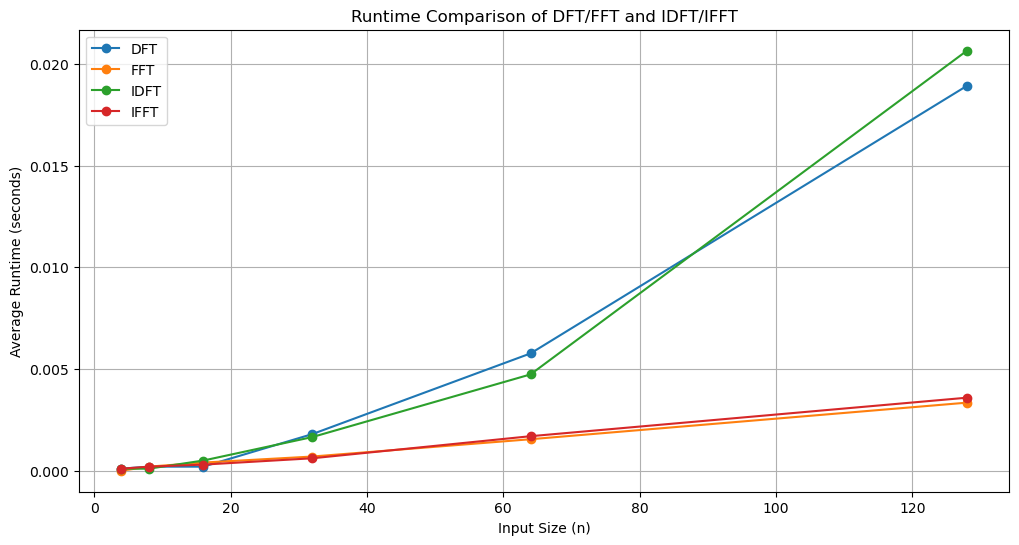

In [74]:
import time
# Timing function
def measure_runtime(algorithm, signal, num_runs=10):
    total_time = 0
    for _ in range(num_runs):
        start_time = time.time()
        algorithm(signal)
        total_time += time.time() - start_time
    return total_time / num_runs

# Store average runtimes
dft_times = []
fft_times = []
idft_times = []
ifft_times = []

for seq in sequences:
    dft_times.append(measure_runtime(DFT, seq))
    fft_times.append(measure_runtime(FFT, seq))
    idft_times.append(measure_runtime(IDFT, seq))
    ifft_times.append(measure_runtime(IFFT, seq))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(n, dft_times, label="DFT", marker='o')
plt.plot(n, fft_times, label="FFT", marker='o')
plt.plot(n, idft_times, label="IDFT", marker='o')
plt.plot(n, ifft_times, label="IFFT", marker='o')

plt.xlabel("Input Size (n)")
plt.ylabel("Average Runtime (seconds)")
plt.title("Runtime Comparison of DFT/FFT and IDFT/IFFT")
plt.legend()
plt.grid()
plt.show()

In [2]:
# Constants
n = 50
samples = np.arange(n)
sampling_rate = 100
wave_velocity = 8000

# Function to generate Signal A and Signal B
def generate_signals(frequency=5):
    noise_freqs = [15, 30, 45]  # Default noise frequencies in Hz
    amplitudes = [0.5, 0.3, 0.1]  # Default noise amplitudes
    noise_freqs2 = [10, 20, 40]
    amplitudes2 = [0.3, 0.2, 0.1]

    dt = 1 / sampling_rate  # Sampling interval in seconds
    time = samples * dt  # Time points corresponding to each sample

    # Original clean signal (sinusoidal)
    original_signal = np.sin(2 * np.pi * frequency * time)

    # Adding noise
    noise_for_signal_A = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                             for noise_freq, amplitude in zip(noise_freqs, amplitudes))
    noise_for_signal_B = sum(amplitude * np.sin(2 * np.pi * noise_freq * time)
                             for noise_freq, amplitude in zip(noise_freqs2, amplitudes2))

    signal_A = original_signal + noise_for_signal_A
    noisy_signal_B = signal_A + noise_for_signal_B

    # Applying random shift
    shift_samples = -9 #np.random.randint(-n // 2, n // 2)  # Random shift
    print(f"Shift Samples: {shift_samples}")
    signal_B = np.roll(noisy_signal_B, shift_samples)

    return signal_A, signal_B

# Generate signals
signal_A, signal_B = generate_signals()

Shift Samples: -9


In [3]:
def zero_pad(signal):
    """
    Pads the input signal with zeros to the next power of 2.
    
    Parameters:
        signal (np.ndarray): Input signal array.
        
    Returns:
        np.ndarray: Zero-padded signal array.
    """
    next_power_of_2 = 2**int(np.ceil(np.log2(len(signal))))
    padded_signal = np.zeros(next_power_of_2, dtype=signal.dtype)
    padded_signal[:len(signal)] = signal
    return padded_signal
def FFT(signal):
    signal = zero_pad(signal)
    N = len(signal)
    if (N==1):
        return signal
    even = signal[::2]
    odd = signal[1::2]
    even_fft = FFT(even)
    odd_fft = FFT(odd)
    return_arr = np.array(np.zeros(N), dtype=complex)
    r = N//2
    for k in range(r):
        twiddler_factor = np.exp(-2j * np.pi * k/N)
        return_arr[k] = even_fft[k] + twiddler_factor * odd_fft[k]
        return_arr[k+r] = even_fft[k] - twiddler_factor * odd_fft[k]
    return return_arr


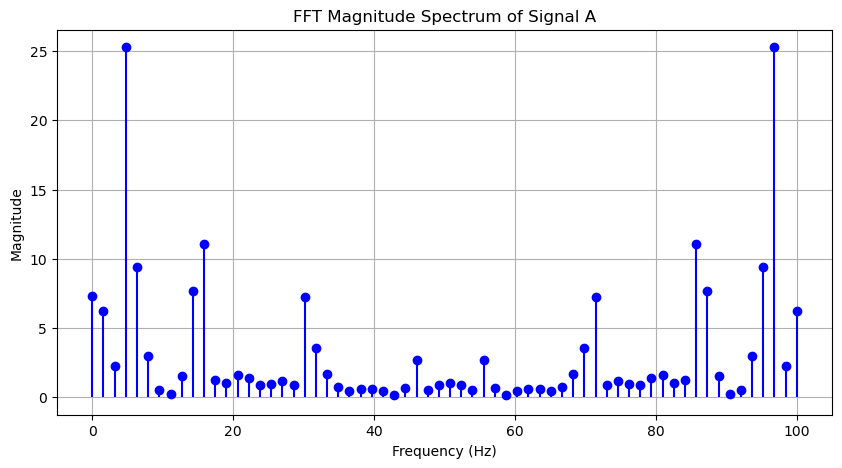

In [5]:
fft_result = FFT(signal_A)

# Compute magnitude spectrum
frequencies = np.linspace(0, sampling_rate, len(fft_result))
magnitude = np.abs(fft_result)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 5))
plt.stem(frequencies, magnitude, linefmt="blue", markerfmt="bo", basefmt=" ")
plt.title("FFT Magnitude Spectrum of Signal A")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [11]:
A = np.array([1,0,0,1])
res = FFT(A)
res

array([2.+0.j, 1.+1.j, 0.+0.j, 1.-1.j])

In [12]:
def IFFT(signal):
    signal = zero_pad(signal)
    N = len(signal)
    if (N==1):
        return signal
    even = signal[::2]
    odd = signal[1::2]
    even_fft = FFT(even)
    odd_fft = FFT(odd)
    return_arr = np.array(np.zeros(N), dtype=complex)
    r = N//2
    for k in range(r):
        twiddler_factor = np.exp(2j * np.pi * k/N)
        return_arr[k] = even_fft[k] + twiddler_factor * odd_fft[k]
        return_arr[k+r] = even_fft[k] - twiddler_factor * odd_fft[k]
    return return_arr/N

In [13]:
A = np.array([5,3-2j,-3,3+2j])
res = IFFT(A)
res

array([ 2.+0.000000e+00j,  3.-6.123234e-17j, -1.+0.000000e+00j,
        1.+6.123234e-17j])